In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("processed_data.csv")
Industry = data[['Industry','# Laid Off']]
Industry = Industry.groupby('Industry').sum().sort_values(by='# Laid Off', ascending=False)[:10]

<Figure size 432x288 with 0 Axes>

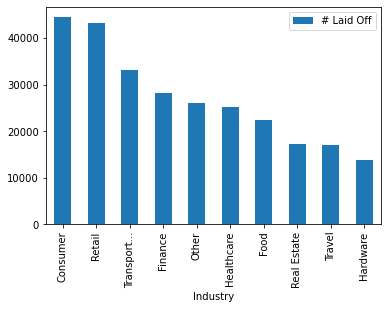

In [67]:
plt.figure()
Industry.plot.bar();

In [68]:
Country = data[['Country','# Laid Off']]
Country = Country.groupby('Country').sum().sort_values(by='# Laid Off', ascending=False)[:10]

<Figure size 432x288 with 0 Axes>

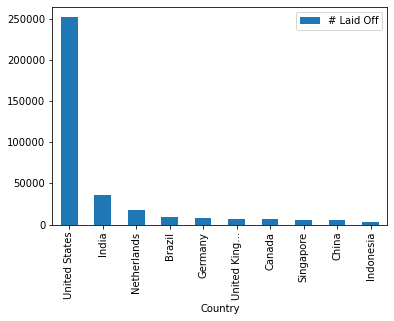

In [70]:
plt.figure()
Country.plot.bar();

In [71]:
range_of_percentage=[]
for p in data['%']:
    per = ''
    if isinstance(p, str):
        for char in p:
            if char == '0' or char == '1' or char == '2' or char == '3' or char == '4' or char == '5' or char == '6' or char == '7' or char == '8' or char == '9':
                per = per + char
    
    if per == '':
        range_of_percentage.append('Unknown')
    else:
        for k in range(10):
            if 10*k < int(per) <= 10*(k+1):
                range_of_percentage.append(f'{10*k}' + '% - ' + f'{10*(k+1)}' + '%')

    
new_col = pd.Series(range_of_percentage)
data['range of %'] = new_col
Percentage = data.groupby('range of %')['Company'].count()
Percentage = pd.DataFrame(Percentage)
Percentage = Percentage.rename(columns={'Company': "# of companies"})

<Figure size 432x288 with 0 Axes>

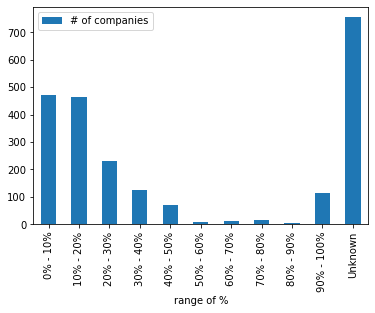

In [72]:
plt.figure()
Percentage.plot.bar();